In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# load data
df = pd.read_csv('../../../data/final-2.csv')
df.drop('index',inplace=True,axis=1)
df['Date']= pd.to_datetime(df['Date'])

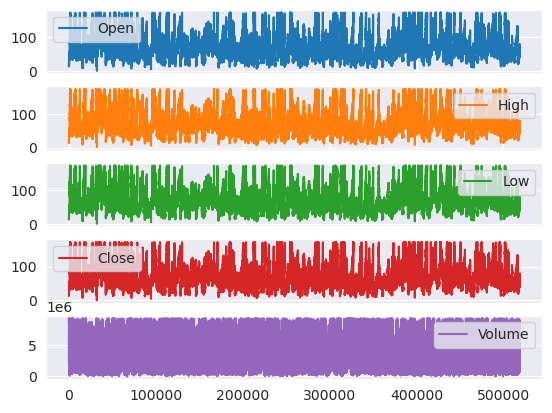

In [2]:
df.drop('Date',axis=1).plot(subplots=True)
plt.show()

In [3]:
df = df[0:5000]
df

,Date,Open,High,Low,Close,Volume
0,2013-02-08,15.07,15.12,14.6300,14.75,8407500
1,2013-02-11,14.89,15.01,14.2600,14.46,8882000
2,2013-02-12,14.45,14.51,14.1000,14.27,8126000
3,2013-02-22,13.57,13.60,13.2100,13.57,6071400
4,2013-02-25,13.60,13.76,13.0000,13.02,7186400
...,...,...,...,...,...,...
4995,2017-07-06,48.83,48.86,47.9000,47.94,5665313
4996,2017-07-07,48.17,48.48,47.9750,48.44,4354311
4997,2017-07-10,48.42,48.53,48.1350,48.23,3480466
4998,2017-07-11,48.20,48.43,48.0352,48.15,4084438


In [4]:
df.shape

(5000, 6)

In [5]:
timeseries = df['Close']
result = adfuller(timeseries)

print('ADF Statistic:', result[0])

if result[1] < 0.05:
    print('Time series is likely stationary')
else:
    print('Time series is likely non-stationary')


ADF Statistic: -2.3136967622478553
Time series is likely non-stationary


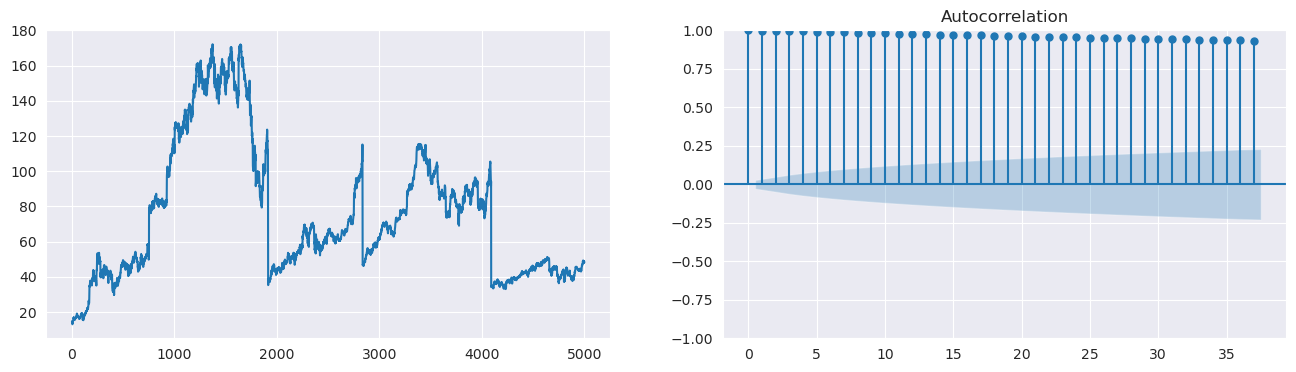

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

fig , (ax1 , ax2) = plt.subplots(1,2,figsize= (16,4))
ax1.plot(df.Close)
ax2.set_ylim(0,1)
plot_acf(df.Close,ax = ax2);

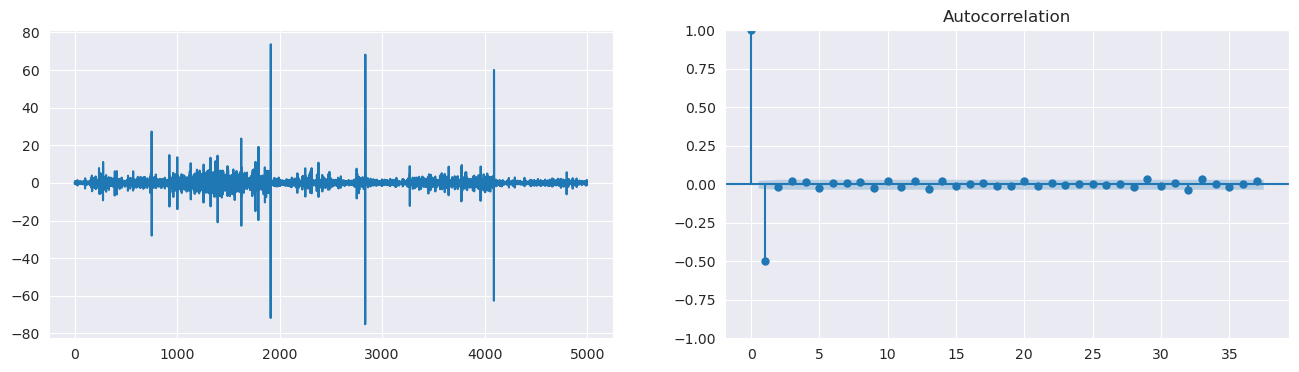

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
diff = df.Close.diff().dropna().diff().dropna()

fig , (ax1 , ax2) = plt.subplots(1,2,figsize= (16,4))
ax1.plot(diff)
ax2.set_ylim(0,1)
plot_acf(diff,ax = ax2);

In [8]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close , test='adf')

1

/home/xcrown/anaconda3/envs/dask_env/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


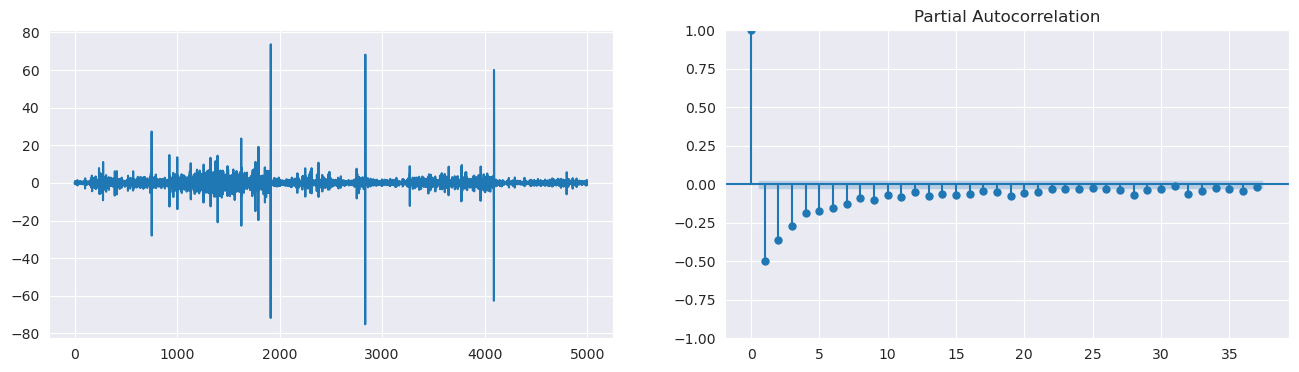

In [20]:
diff = df.Close.diff().dropna().diff().dropna()

fig , (ax1 , ax2) = plt.subplots(1,2,figsize= (16,4))
ax1.plot(diff)
ax2.set_ylim(0,1)
plot_pacf(diff,ax = ax2);

In [ ]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

p = d = q = range(0, 2) # increase by 1

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # change the 12 to 4


# Define the parameter grid for grid search
param_grid = {
    'order': pdq,  # ARIMA(p, d, q) parameters
    'seasonal_order': seasonal_pdq  # Seasonal ARIMA(P, D, Q, S) parameters
}

best_score = np.inf
best_params = None

# Perform grid search
for order in param_grid['order']:
    for seasonal_order in param_grid['seasonal_order']:
        arima_model = auto_arima(df['Close'], order=order, seasonal_order=seasonal_order, seasonal=True, suppress_warnings=True)
        predictions = arima_model.predict(n_periods=len(df))
        mse = mean_squared_error(df['Close'], predictions)
        if mse < best_score:
            best_score = mse
            best_params = (order, seasonal_order)

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


In [24]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')